In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import copy
%matplotlib inline

In [32]:
dataset = pd.read_csv('Data_Base.csv', delimiter=";")
dataset.columns = ['The year of the exam', 'The age of college entrance exams', 'Humanities', 'Natural Science', 'Languages', 'Math', 'State', 'Day 1 presence', 'Day 2 presence', 'Gender']

In [33]:
dataset.head()

,The year of the exam,The age of college entrance exams,Humanities,Natural Science,Languages,Math,State,Day 1 presence,Day 2 presence,Gender
0,2015,42.0,705.3,657.4,591.1,732.3,Rio Grande do Sul,1,1,M
1,2015,21.0,NaN,NaN,NaN,NaN,Minas Gerais,0,0,M
2,2015,22.0,531.1,528.5,511.3,566.5,Pernambuco,1,1,M
3,2015,23.0,NaN,NaN,NaN,NaN,Minas Gerais,0,0,F
4,2015,18.0,730.6,679.9,621.2,732.4,Minas Gerais,1,1,M


In [34]:
dataset.drop(['Day 1 presence', 'Day 2 presence'], inplace=True, axis=1)

In [35]:
dataset.dropna(inplace=True)
dataset.head()

,The year of the exam,The age of college entrance exams,Humanities,Natural Science,Languages,Math,State,Gender
0,2015,42.0,705.3,657.4,591.1,732.3,Rio Grande do Sul,M
2,2015,22.0,531.1,528.5,511.3,566.5,Pernambuco,M
4,2015,18.0,730.6,679.9,621.2,732.4,Minas Gerais,M
5,2015,19.0,658.0,598.7,579.0,576.4,Santa Catarina,M
6,2015,17.0,671.9,652.1,609.3,685.5,São Paulo,F


In [36]:
dataset.shape

(19657144, 8)

In [37]:
dataset.describe()

,The year of the exam,The age of college entrance exams,Humanities,Natural Science,Languages,Math
count,1.965714e+07,1.965714e+07,1.965714e+07,1.965714e+07,1.965714e+07,1.965714e+07
mean,2.016332e+03,2.177440e+01,5.460685e+02,4.889006e+02,5.161110e+02,4.991518e+02
std,1.090022e+00,7.318121e+00,7.819523e+01,7.362695e+01,7.038487e+01,1.077735e+02
min,2.015000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.015000e+03,1.700000e+01,4.916000e+02,4.321000e+02,4.695000e+02,4.178000e+02
50%,2.016000e+03,1.900000e+01,5.519000e+02,4.791000e+02,5.199000e+02,4.791000e+02
75%,2.017000e+03,2.300000e+01,6.031000e+02,5.373000e+02,5.658000e+02,5.631000e+02
max,2.018000e+03,9.200000e+01,8.683000e+02,8.856000e+02,8.258000e+02,1.008300e+03


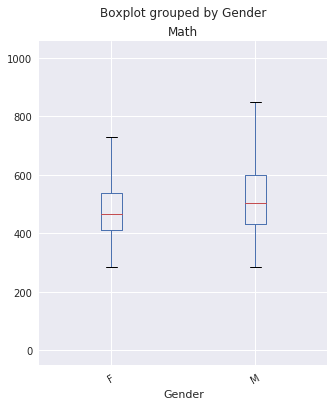

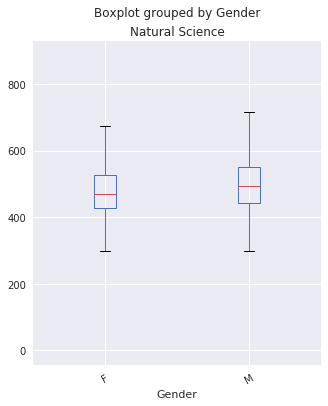

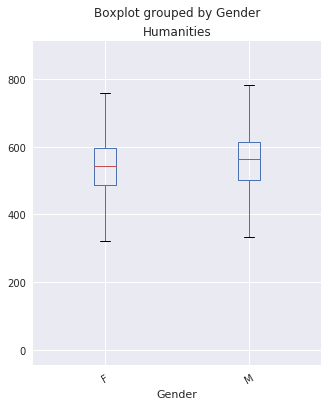

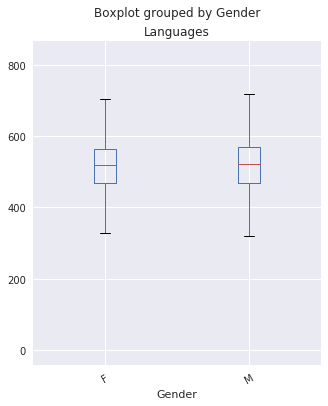

In [38]:
dataset.boxplot('Math','Gender',rot = 30,figsize=(5,6))
dataset.boxplot('Natural Science','Gender',rot = 30,figsize=(5,6))
dataset.boxplot('Humanities','Gender',rot = 30,figsize=(5,6))
dataset.boxplot('Languages','Gender',rot = 30,figsize=(5,6))

Index(['São Paulo', 'Minas Gerais', 'Bahia', 'Rio de Janeiro', 'Ceará',
       'Pernambuco', 'Pará', 'Rio Grande do Sul', 'Paraná', 'Maranhão',
       'Goiás', 'Paraíba', 'Rio Grande do Norte', 'Piauí', 'Santa Catarina',
       'Espírito Santo', 'Amazonas', 'Distrito Federal', 'Alagoas',
       'Mato Grosso', 'Sergipe', 'Mato Grosso do Sul', 'Rondônia', 'Tocantins',
       'Acre', 'Amapá', 'Roraima'],
      dtype='object')


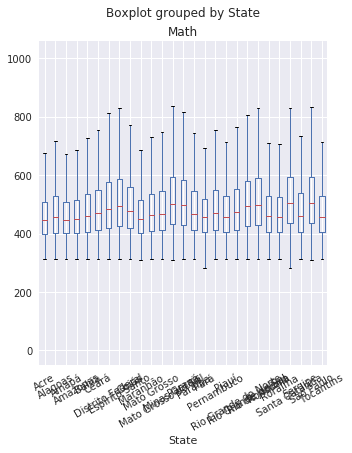

In [39]:
dataset.boxplot('Math','State',rot = 30,figsize=(5,6))

states = dataset['State'].value_counts()
print(states.index)

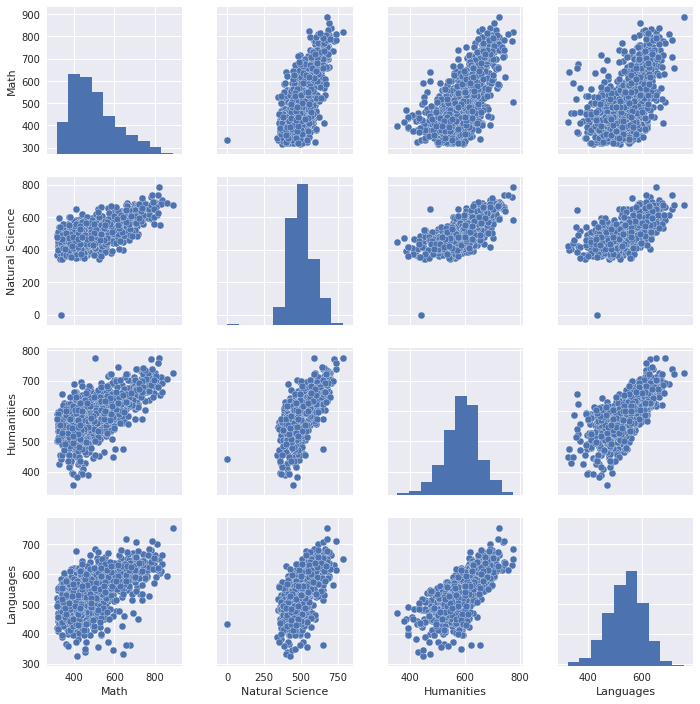

In [40]:
sns.set()
cols = ['Math', 'Natural Science', 'Humanities', 'Languages']
plot_dataset = dataset.head(1000)
sns.pairplot(plot_dataset[cols], size = 2.5)
plt.show();

In [41]:
dataset.drop(['State'], inplace=True, axis=1)
dataset.drop(['Gender'], inplace=True, axis=1)

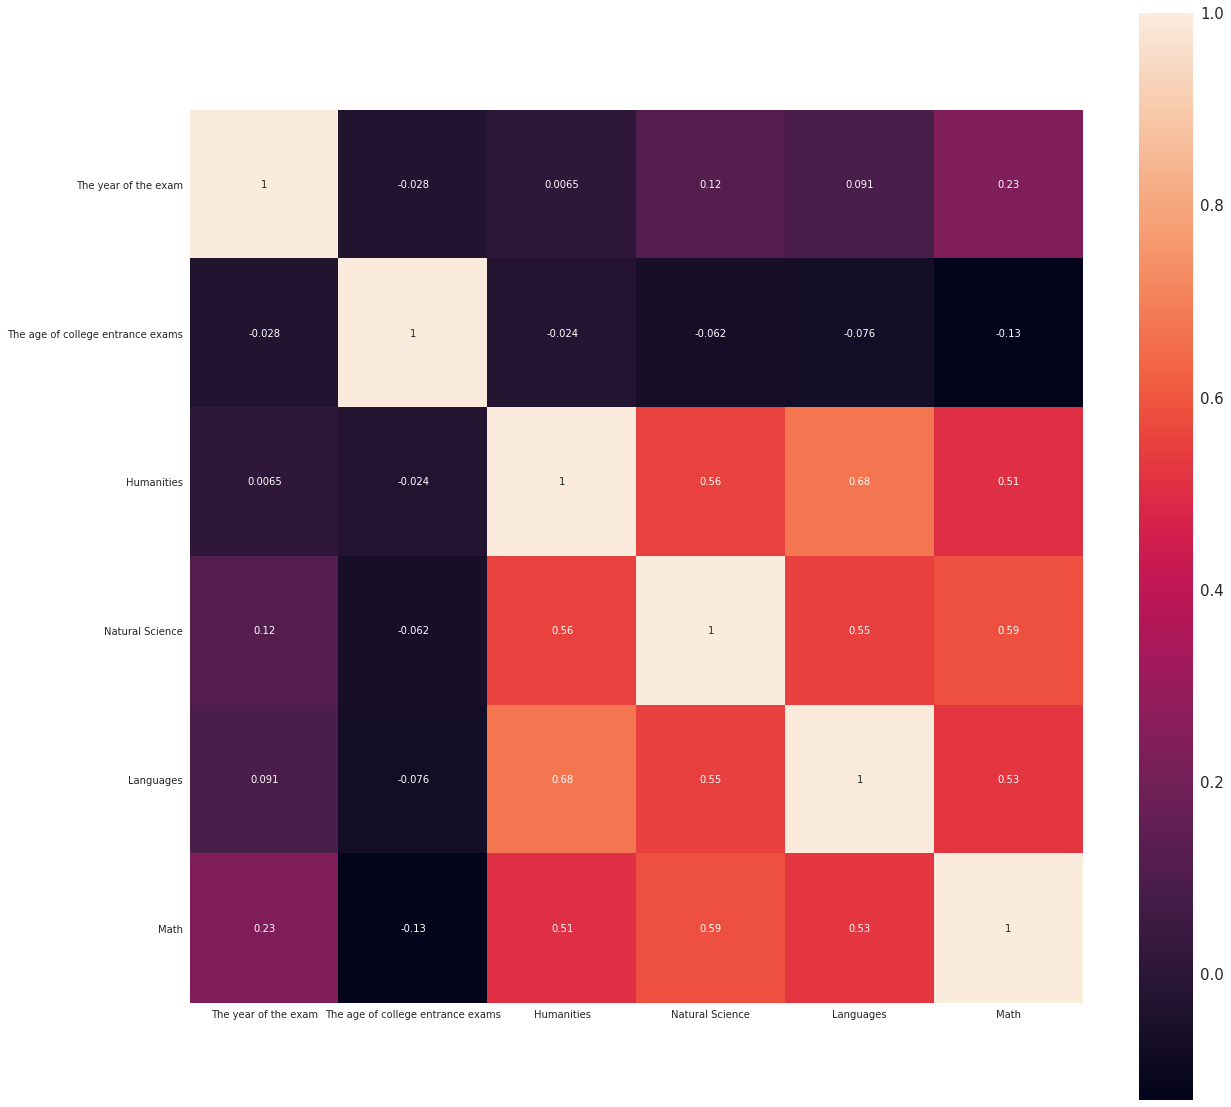

In [42]:
fig = plt.subplots(figsize = (20,20))
sns.set(font_scale=1.5)
sns.heatmap(dataset.corr(),square = True,cbar=True,annot=True,annot_kws={'size': 10})
plt.show()

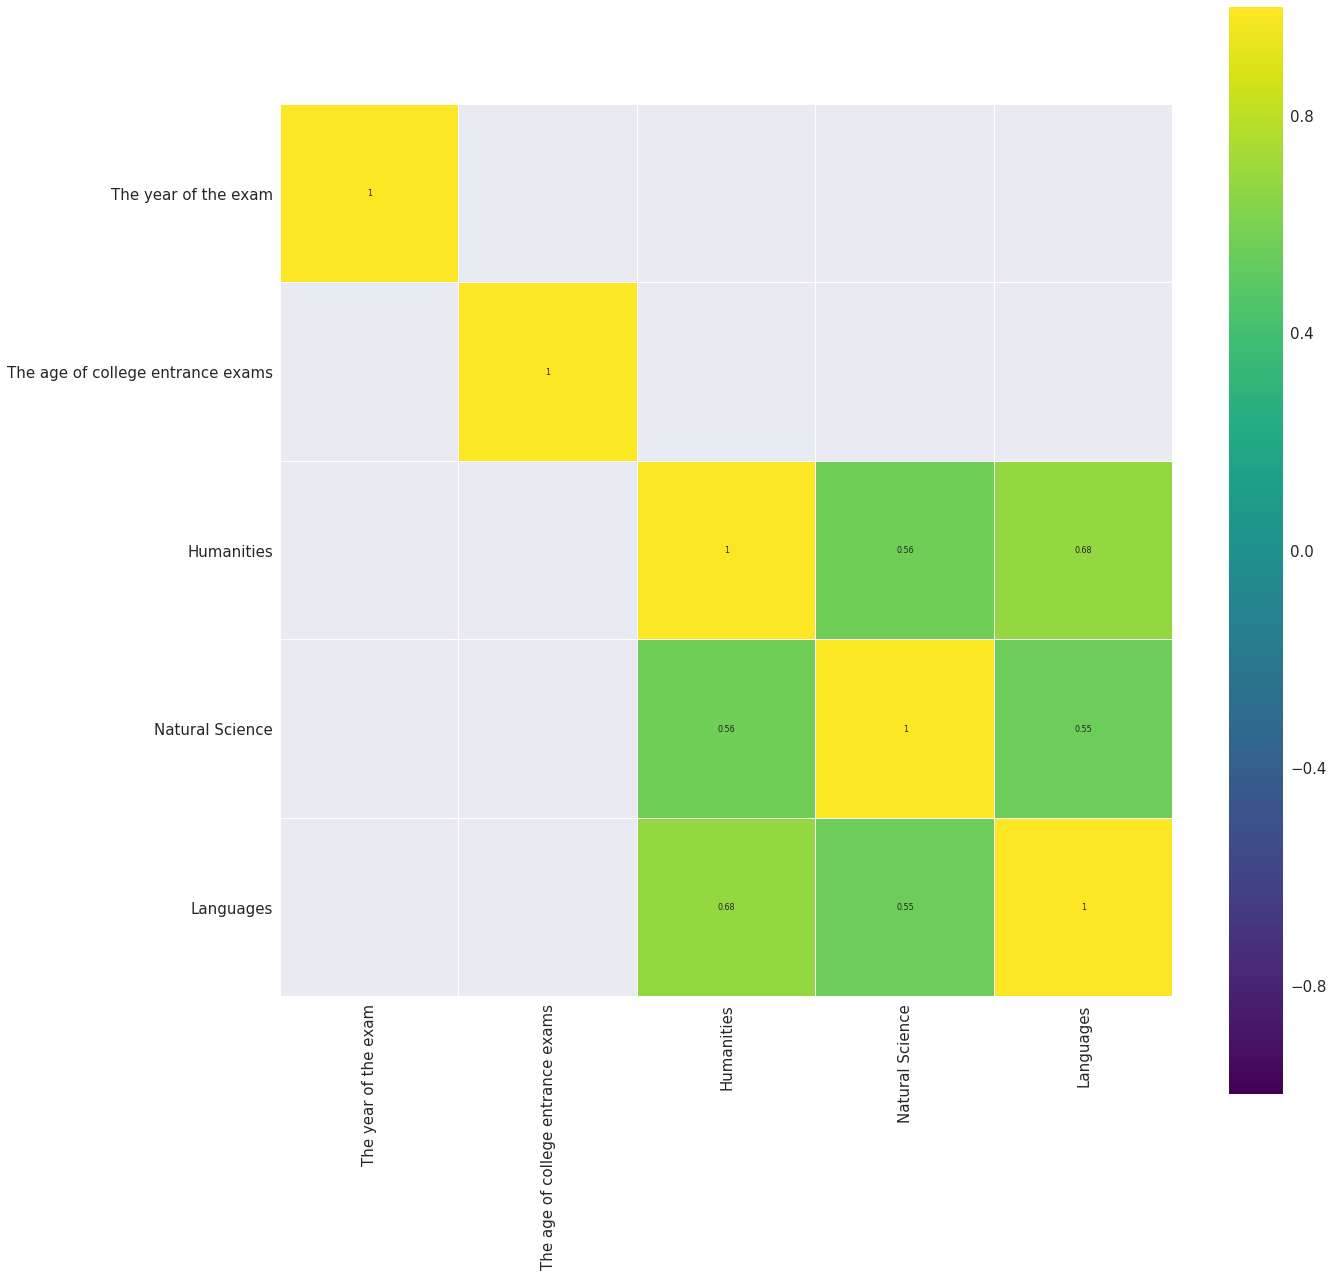

In [43]:
corr = dataset.drop('Math', axis=1).corr() # We already examined SalePrice correlations
plt.figure(figsize=(20, 20))

sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.4)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

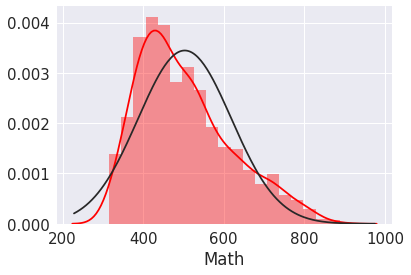

In [44]:
from scipy.stats import norm

sns.distplot(plot_dataset['Math'], color='r', fit=norm, hist_kws={'alpha': 0.4});

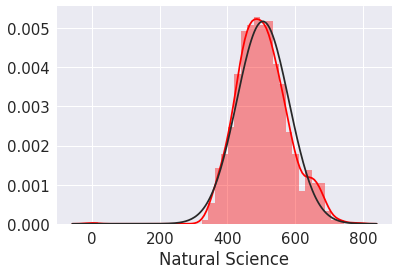

In [45]:
sns.distplot(plot_dataset['Natural Science'], color='r', fit=norm, hist_kws={'alpha': 0.4});

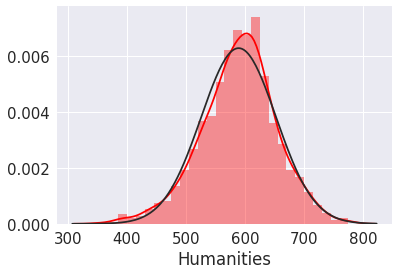

In [46]:
sns.distplot(plot_dataset['Humanities'], color='r', fit=norm, hist_kws={'alpha': 0.4});

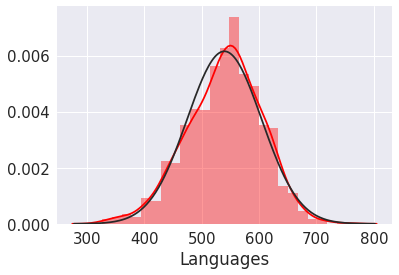

In [47]:
sns.distplot(plot_dataset['Languages'], color='r', fit=norm, hist_kws={'alpha': 0.4});

In [48]:
X = dataset.loc[:, dataset.columns != 'Math']
y = dataset['Math']

2 features with a correlation magnitude greater than 0.50.



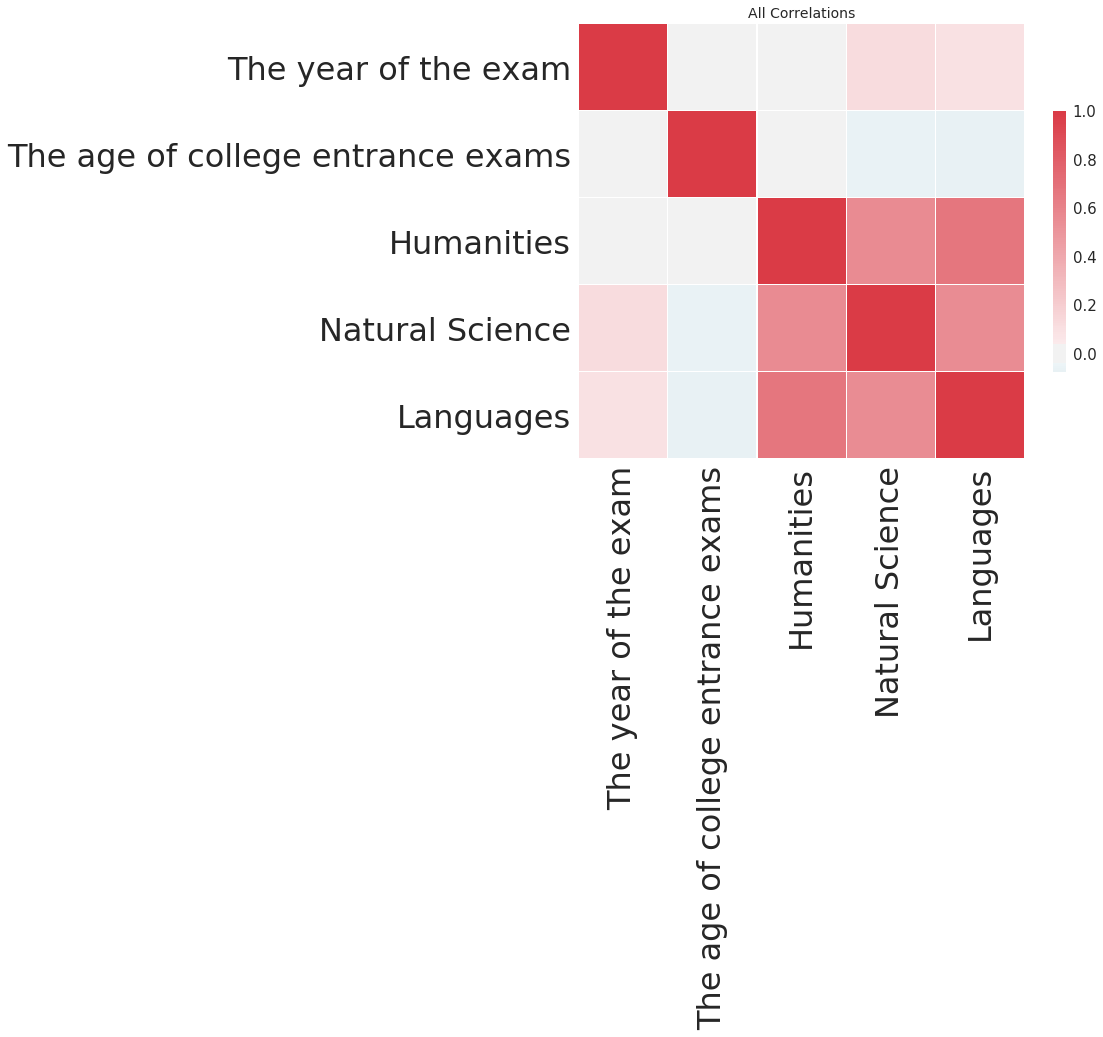

In [49]:
from feature_selector import FeatureSelector# Features are in train and labels are in train_labels

fs = FeatureSelector(data = X, labels = y)
fs.identify_collinear(correlation_threshold = 0.5)
fs.plot_collinear(plot_all = True)

In [50]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

#I split the data X, y into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Convert pandas dataframes into numpy arrays (it is needed for the fitting)
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

#Create and fit the model
model = LinearRegression()

#Fit the model using the training data
model.fit(X_train,y_train)

#Predict unseen data
y_predicted = model.predict(X_test)
scores = model.score(X_test, y_test)

print(scores)

0.45211589157166077


In [51]:
from sklearn.metrics import mean_squared_error, r2_score

# The coefficients
print('Coefficients: \n', model.coef_)
# The mean squared error
print('Mean squared error: %.2f' % mean_squared_error(y_test, y_predicted))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f' % r2_score(y_test, y_predicted))

Coefficients: 
 [17.00194885 -1.26877428  0.2475577   0.52706979  0.28185395]
Mean squared error: 6374.30
Coefficient of determination: 0.45


In [52]:
from sklearn.model_selection import learning_curve
train_sizes = [100, 1000, 10000, 100000, 1000000, 15725715]
train_sizes, train_scores, validation_scores = learning_curve(
    estimator = LinearRegression(),
    X = X, y = y, train_sizes = train_sizes, cv = 5,
    scoring = 'neg_mean_squared_error')

print(train_sizes, train_scores, validation_scores)

[     100     1000    10000   100000  1000000 15725715] [[-5216.88182292 -8168.26883867 -8168.26883867 -8168.26883867
  -8168.26883867]
 [-6151.93442275 -6742.09283201 -6742.09283201 -6742.09283201
  -6742.09283201]
 [-5950.20110926 -7292.51415384 -7292.51415384 -7292.51415384
  -7292.51415384]
 [-5828.9553751  -6816.23071931 -6816.23071931 -6816.23071931
  -6816.23071931]
 [-6347.65893904 -6811.29725086 -6811.29725086 -6811.29725086
  -6811.29725086]
 [-6300.94092674 -6361.05698612 -6385.00254777 -6351.95685063
  -6434.37496699]] [[-6818.1765256  -7365.49555181 -7756.29629062 -9033.14581837
  -8675.97977151]
 [-6609.43985799 -6994.65738438 -7567.3521519  -8660.63453657
  -8714.54252831]
 [-6679.40512797 -6777.82170557 -7180.98911184 -7925.6321747
  -8345.63472157]
 [-6739.81596722 -6788.64849327 -7276.27524259 -8233.04967916
  -8600.42915459]
 [-6666.99433615 -6771.43979588 -7209.50500463 -8018.9735486
  -8387.83507438]
 [-6677.71875418 -6422.68786928 -6337.24728909 -6466.27719074
  -

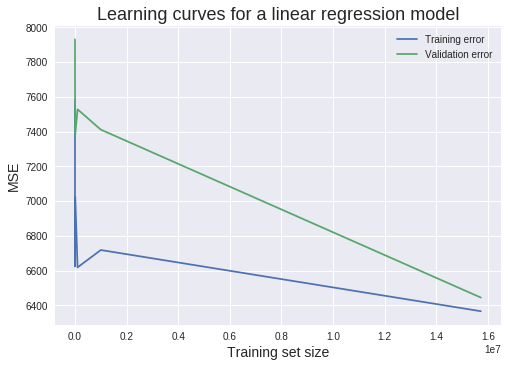

In [53]:
import matplotlib.pyplot as plt

train_scores_mean = -train_scores.mean(axis = 1)
validation_scores_mean = -validation_scores.mean(axis = 1)

plt.style.use('seaborn')
plt.plot(train_sizes, train_scores_mean, label = 'Training error')
plt.plot(train_sizes, validation_scores_mean, label = 'Validation error')
plt.ylabel('MSE', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves for a linear regression model', fontsize = 18)
plt.legend()
plt.show()

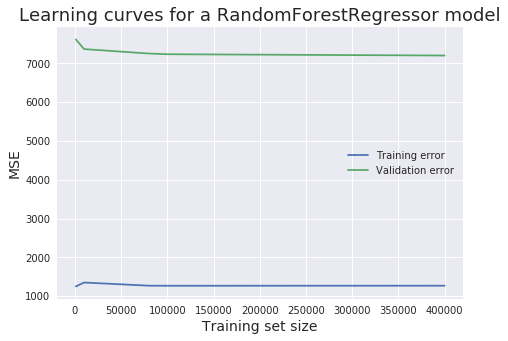

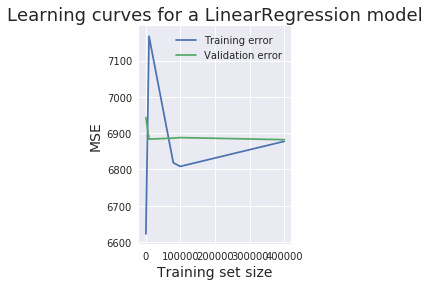

In [30]:
### Bundling our previous work into a function ###
def learning_curves(estimator, X, y, train_sizes, cv):
    train_sizes, train_scores, validation_scores = learning_curve(
    estimator, X, y, train_sizes =
    train_sizes,
    cv = cv, scoring = 'neg_mean_squared_error')
    train_scores_mean = -train_scores.mean(axis = 1)
    validation_scores_mean = -validation_scores.mean(axis = 1)

    plt.plot(train_sizes, train_scores_mean, label = 'Training error')
    plt.plot(train_sizes, validation_scores_mean, label = 'Validation error')

    plt.ylabel('MSE', fontsize = 14)
    plt.xlabel('Training set size', fontsize = 14)
    title = 'Learning curves for a ' + str(estimator).split('(')[0] + ' model'
    plt.title(title, fontsize = 18)
    plt.legend()
    plt.show()

### Plotting the two learning curves ###

from sklearn.ensemble import RandomForestRegressor

X = dataset.head(500000).loc[:, dataset.columns != 'Math']
y = dataset.head(500000)['Math']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

plt.figure(figsize = (16,5))
train_sizes = [1000, 10000, 80000, 100000, 400000]

for model, i in [(RandomForestRegressor(), 1), (LinearRegression(),2)]:
    plt.subplot(1,2,i)
    learning_curves(model, X, y, train_sizes, 5)

In [29]:
import statsmodels.api as sm
model = sm.OLS(y, X).fit()
predictions = model.predict(X) # make the predictions by the model

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   Math   R-squared (uncentered):                   0.974
Model:                            OLS   Adj. R-squared (uncentered):              0.974
Method:                 Least Squares   F-statistic:                          1.475e+08
Date:                Sat, 18 Apr 2020   Prob (F-statistic):                        0.00
Time:                        17:00:16   Log-Likelihood:                     -1.1458e+08
No. Observations:            19657144   AIC:                                  2.292e+08
Df Residuals:                19657139   BIC:                                  2.292e+08
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
The year of the exam                 -0.0220   8.43e-05   -260.646      0.000      -0.022      -0.022
The age of college entrance exams    -1.7026      0.003   -672.026      0.000      -1.708      -1.698
Humanities                            0.1195      0.000    326.014      0.000       0.119       0.120
Natural Science                       0.6129      0.000   2034.120      0.000       0.612       0.613
Languages                             0.4179      0.000   1154.671      0.000       0.417       0.419
==============================================================================
Omnibus:                   102287.405   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           111810.893
Skew:                           0.143   Prob(JB):                         0.00
Kurtosis:                       3.235   Cond. No.                         302.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""